<a href="https://colab.research.google.com/github/AbelPhilippe/Cybersecurity_Attack_Detected/blob/main/Cybersecurity_Attack_Detected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBS**

In [36]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn
import tensorflow as tf
import kagglehub
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **IMPORT DATA**

In [9]:
path = kagglehub.dataset_download("dnkumars/cybersecurity-intrusion-detection-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cybersecurity-intrusion-detection-dataset


# **DATA VISUALIZATION**

In [10]:
df = pd.read_csv('/kaggle/input/cybersecurity-intrusion-detection-dataset/cybersecurity_intrusion_data.csv')
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [11]:
df = df.drop('session_id', axis=1)
df

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...
9532,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   object 
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   encryption_used      7571 non-null   object 
 5   ip_reputation_score  9537 non-null   float64
 6   failed_logins        9537 non-null   int64  
 7   browser_type         9537 non-null   object 
 8   unusual_time_access  9537 non-null   int64  
 9   attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 745.2+ KB


In [13]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [14]:
df.isnull().sum()

,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0
attack_detected,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,0
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0
attack_detected,0


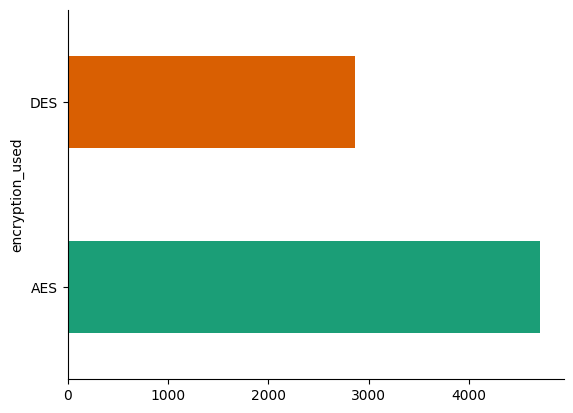

In [18]:
df.groupby('encryption_used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

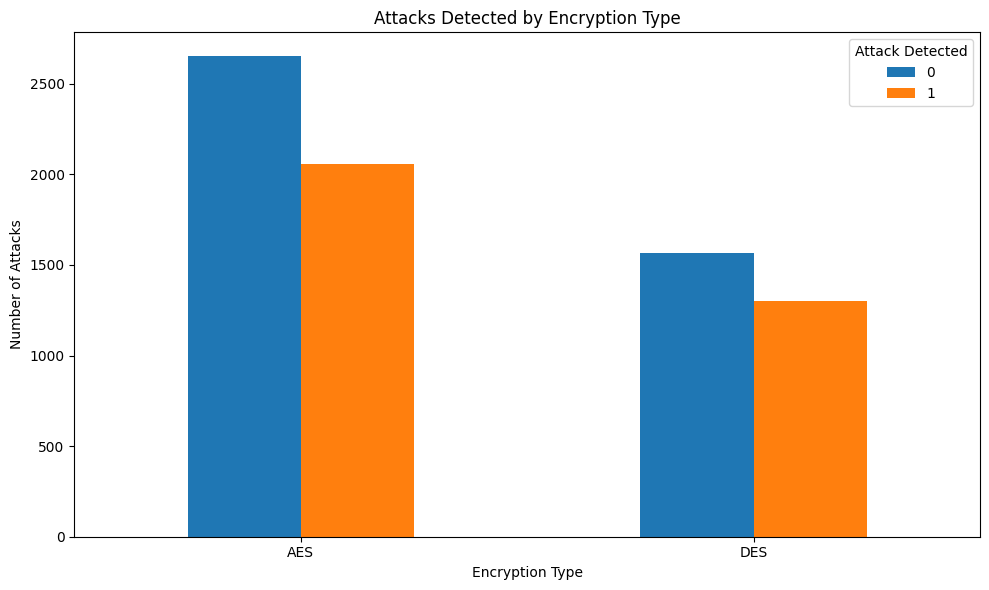

In [19]:
attack_counts = df.groupby(['encryption_used', 'attack_detected']).size().unstack(fill_value=0)
attack_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Attacks Detected by Encryption Type')
plt.xlabel('Encryption Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.legend(title='Attack Detected')
plt.tight_layout()
plt.show()

In [45]:
attack_counts = df.groupby(['encryption_used', 'attack_detected']).size().unstack(fill_value=0)
fig = go.Figure()

In [46]:
fig.add_trace(go.Bar(
    x=attack_counts.index,
    y=attack_counts[1],
    name='1 - Attack Detected'
))

fig.add_trace(go.Bar(
    x=attack_counts.index,
    y=attack_counts[0],
    name='0 - No Attack Detected'
))

fig.update_layout(
        title = 'Attacks Detected by Encryption Type',
        xaxis_title='Encryption Type',
        yaxis_title='Number of Attacks',
        barmode='group',
        title_font=dict(size = 24),
        title_pad=dict(t = 5),
        legend=dict(
            orientation="v",
            x = 1.05,
            y = 0.5,
            xanchor = 'left',
            font=dict(size=18)
        ),
        width = 1000,
        height = 700,
        colorway=px.colors.sequential.Viridis,
    )
fig.show()

#-----------------------------------#
# 1 represents 'attack detected'
# 0 represents 'no attack detected'
#-----------------------------------#

In [22]:
protocol_counts = df.groupby('protocol_type').size()
fig = px.bar(protocol_counts,
             x=protocol_counts.index,
             y=protocol_counts.values,
             labels={'x': 'Protocol Used', 'y': 'Count'},
             title='Distribution of Protocols Used',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=32),
    title_pad=dict(t=5),
    width=1000,
    height=700,
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
    xaxis_tickfont=dict(size=16),
    yaxis_tickfont=dict(size=16)
)

fig.show()

In [23]:
attack_counts = df.groupby(['protocol_type', 'attack_detected']).size().unstack(fill_value=0)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=attack_counts.index,
    y=attack_counts[1],
    name='1 - Attack Detected'
))

fig.add_trace(go.Bar(
    x=attack_counts.index,
    y=attack_counts[0],
    name='0 - No Attack Detected'
))

fig.update_layout(
        title = 'Attacks Detected by Protocol Type',
        xaxis_title='Protocol Type',
        yaxis_title='Number of Attacks',
        colorway=px.colors.sequential.Viridis,
        barmode='group',
        title_font=dict(size = 24),
        title_pad=dict(t = 5),
        legend=dict(
            orientation="v",
            x = 1.05,
            y = 0.5,
            xanchor = 'left',
            font=dict(size=18)
        ),
        width = 1000,
        height = 700,
        xaxis_title_font=dict(size=20),
        yaxis_title_font=dict(size=20),
        xaxis_tickfont=dict(size=16),
        yaxis_tickfont=dict(size=16)
    )
fig.show()

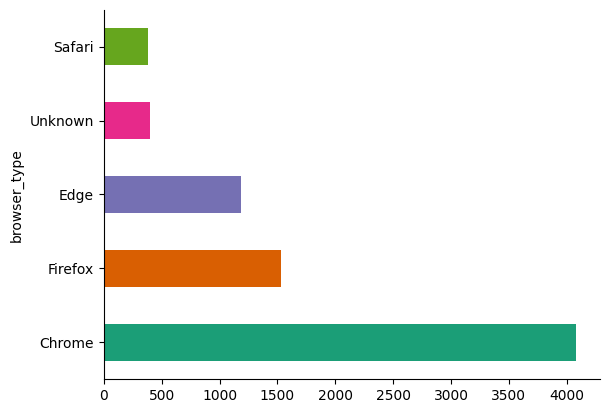

In [24]:
df.groupby('browser_type').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [25]:
top_browsers = df['browser_type'].value_counts().head(3)
fig = px.pie(top_browsers, values=top_browsers.values,
             names=top_browsers.index, title='Top 3 Browsers',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
        title_x = 0.48,
        title_font=dict(size = 40),
        title_pad=dict(t = 5),
        legend=dict(
            orientation="v",
            x = 1.0,
            y = 0.5,
            xanchor = 'left',
            font=dict(size=25)
        ),
        width = 1000,
        height = 700
    )
fig.show()

In [26]:
filtered_df = df[(df['failed_logins'] > 1) & (df['attack_detected'] == 1)]

fig = px.histogram(filtered_df, x='failed_logins', nbins=20,
                   title='Distribution of Failed Logins (Attacks Detected)',
                   labels={'failed_logins': 'Number of Failed Logins'},
                   color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=24),
    xaxis_title_font=dict(size=22),
    yaxis_title_font=dict(size=22),
    xaxis_tickfont=dict(size=20),
    yaxis_tickfont=dict(size=20),
    width=800,
    height=600,
)
fig.show()

In [35]:
Attack_Condition = (df['login_attempts'] > 5) | (df['failed_logins'] >= 3)

hits = (Attack_Condition & (df['attack_detected'] == 1)).sum()
total_condition = Attack_Condition.sum()
total_attacks = df['attack_detected'].sum()

print(f"Cases that meet the condition:{total_condition}")
print(f"Of these, how many were identified as attacks: {hits}")
print(f"Total attacks: {total_attacks}")
print(f"Rule accuracy: {hits / total_condition:.2%}")

Cases that meet the condition:2591
Of these, how many were identified as attacks: 2096
Total attacks: 3354
Rule accuracy: 80.90%


# **ENCODER**

In [28]:
LB = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LB.fit_transform(df[col])
df

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,453,1,5,532.540888,0,0.054874,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
9528,535,1,7,50.518476,1,0.767659,1,1,1,1
9531,746,1,7,315.151758,1,0.190059,3,0,0,1
9532,194,0,3,226.049889,0,0.517737,3,0,0,1
9534,664,1,5,35.170248,0,0.359200,1,2,0,0


# **CORRELATION MATRIX**

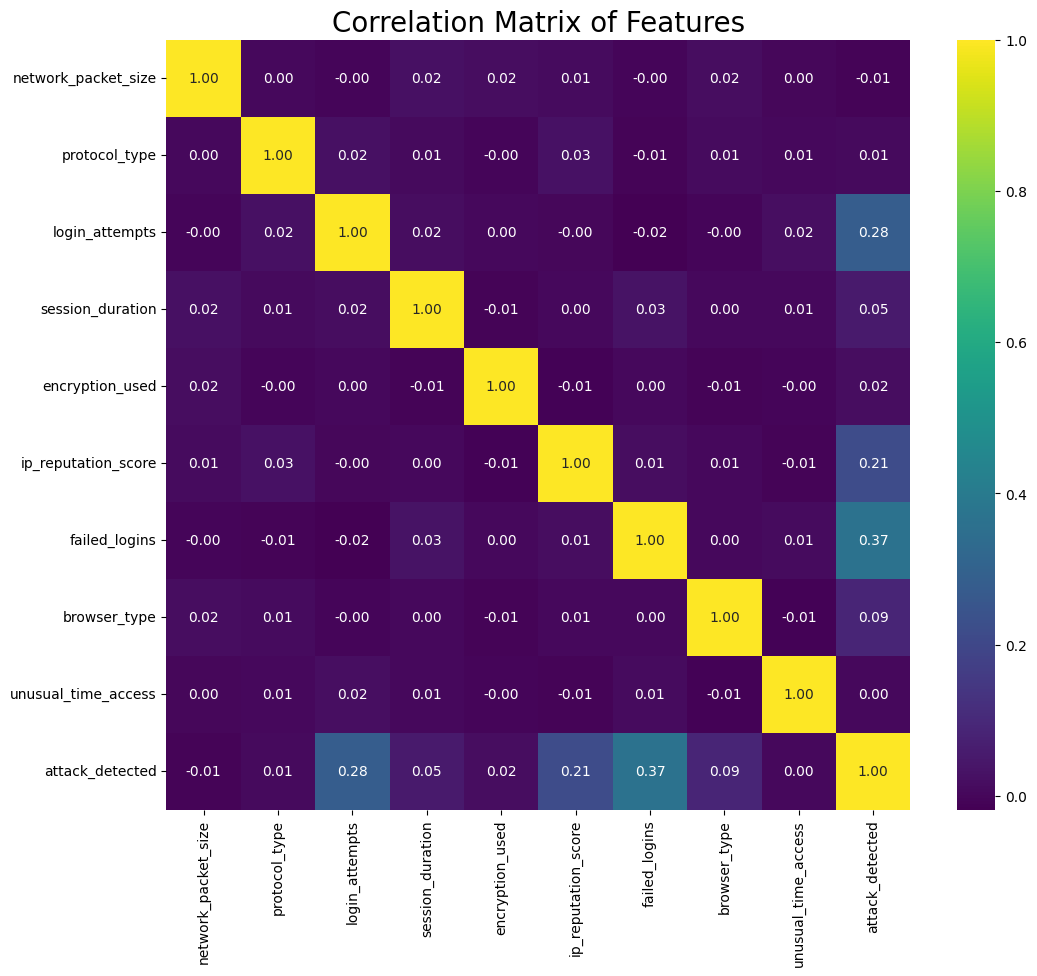

In [29]:
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

# **DEFINE X AND Y**

In [30]:
X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **REGRESSION MODELS**

In [31]:
Regression_Models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': GradientBoostingRegressor(),
    'SGDRegressor': SGDRegressor(),
    'KNN': KNeighborsRegressor(),
}

In [32]:
for name, model in Regression_Models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print(f"\nMetrics for {name}:")
    print(f"Train Score: {score_train}")
    print(f"Test Score: {score_test}")
    print(f"Mean Squared Error (Train): {mse_train}")
    print(f"Mean Squared Error (Test): {mse_test}")
    print(f"R-squared (Test): {r2}")


Metrics for Linear Regression:
Train Score: 0.26895221493206334
Test Score: 0.2646707305927396
Mean Squared Error (Train): 0.1803479726429227
Mean Squared Error (Test): 0.18159859320772262
R-squared (Test): 0.2646707305927396

Metrics for Random Forest:
Train Score: 0.9462856371578128
Test Score: 0.6460025139635237
Mean Squared Error (Train): 0.013251221928665787
Mean Squared Error (Test): 0.08742402640264027
R-squared (Test): 0.6460025139635237

Metrics for Gradient Boosting:
Train Score: 0.6593710815471165
Test Score: 0.6505469296636621
Mean Squared Error (Train): 0.08403244783898783
Mean Squared Error (Test): 0.08630172713831008
R-squared (Test): 0.6505469296636621

Metrics for Decision Tree:
Train Score: 1.0
Test Score: 0.2569782334863471
Mean Squared Error (Train): 0.0
Mean Squared Error (Test): 0.1834983498349835
R-squared (Test): 0.2569782334863471

Metrics for XGBoost:
Train Score: 0.6593710815471165
Test Score: 0.6504712434179234
Mean Squared Error (Train): 0.0840324478389878

# **CLASSIFICATION MODELS**

In [33]:
Classification_Models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state = 0),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
}

Decision Tree classification report
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       841
           1       0.79      0.83      0.81       674

    accuracy                           0.83      1515
   macro avg       0.83      0.83      0.83      1515
weighted avg       0.83      0.83      0.83      1515

[[695 146]
 [112 562]]


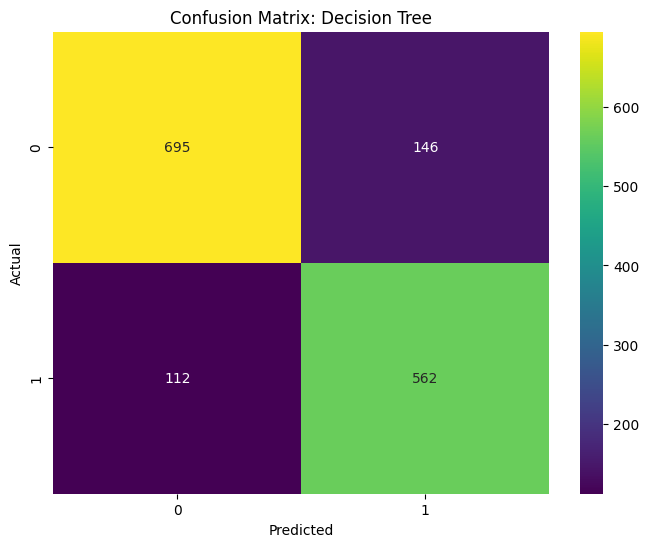

Random Forest classification report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       841
           1       1.00      0.78      0.88       674

    accuracy                           0.90      1515
   macro avg       0.93      0.89      0.90      1515
weighted avg       0.92      0.90      0.90      1515

[[841   0]
 [148 526]]


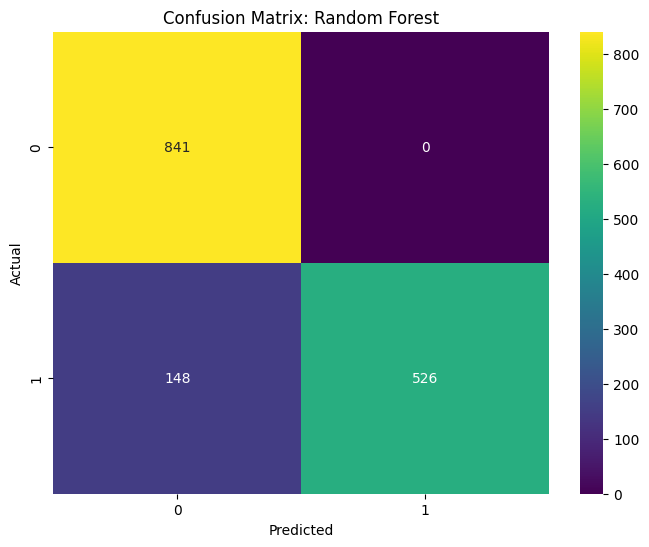

Naive Bayes classification report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       841
           1       0.86      0.77      0.81       674

    accuracy                           0.84      1515
   macro avg       0.84      0.83      0.83      1515
weighted avg       0.84      0.84      0.84      1515

[[754  87]
 [157 517]]


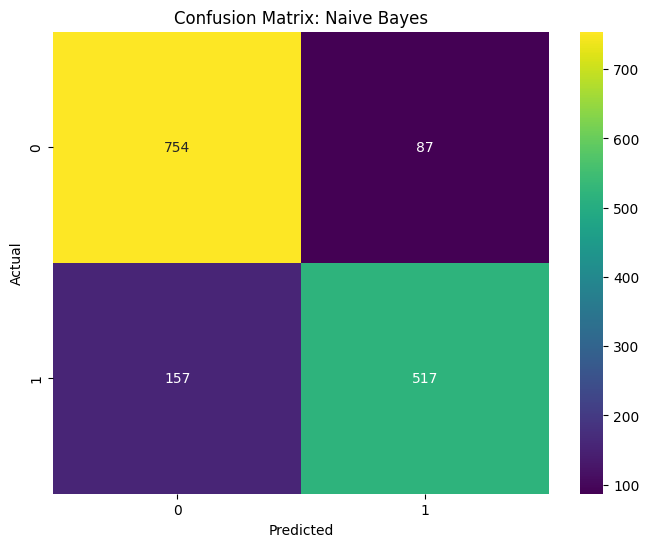

Neural Network classification report
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       841
           1       0.75      0.45      0.56       674

    accuracy                           0.69      1515
   macro avg       0.71      0.67      0.66      1515
weighted avg       0.70      0.69      0.67      1515

[[740 101]
 [370 304]]


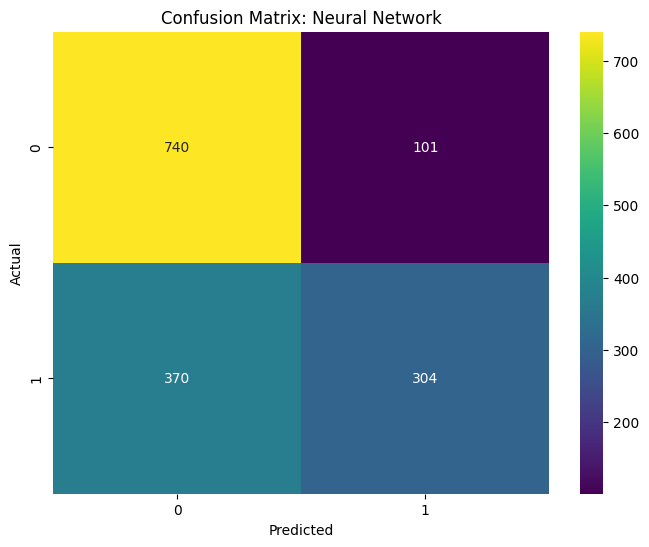

XGBoost classification report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       841
           1       0.97      0.79      0.87       674

    accuracy                           0.90      1515
   macro avg       0.91      0.89      0.89      1515
weighted avg       0.91      0.90      0.89      1515

[[825  16]
 [141 533]]


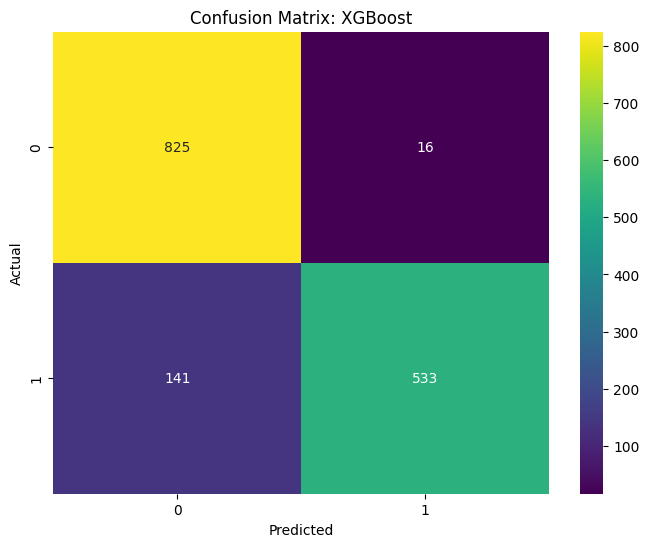

In [34]:
for name, model in Classification_Models.items():
  print(name + " classification report")
  model.fit(X_train, y_train)
  predicts = model.predict(X_test)
  print(classification_report(y_test, predicts))
  cm = confusion_matrix(y_test, predicts)
  print(confusion_matrix(y_test, predicts))
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
              xticklabels = ['0', '1'],
              yticklabels = ['0', '1'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix: " + name)
  plt.show()

# **INSIGHTS**

#- The encoding method is predominantly AES.
#- DES encoder attacks are more easily detected.
#- The most used protocol is TCP.
#- Classification models fit better than regression models.
#- Random Forest is promising.
#- If the number of Login Attempts is greater than 5, or if the number of failed_logins is greater than or equal to 3, there is an 80% chance that an attack has been detected.